# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy #Biblioteca spotipy para interactuar con la API de Spotify
from spotipy.oauth2 import SpotifyClientCredentials #Autentica la aplicación con las credenciales de cliente de Spotify



In [2]:
#Carga de variables desde el archivo .env
# .env esta en la lista gitignore para no ser considerado al hacer commit esto para proteccion de informacion que pueda comprometer la seguridad y la privacidad.
load_dotenv() # Al correr este metodo debemos obtener como resultado TRUE, de este modo aseguramos que las variables de entorno CLIENT_ID y CLIENT_SECRET fueron cargadas de forma correcta.


True

In [3]:
#Guardamos los credenciales en dos variable sin exponerla.
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

In [4]:
#Creamos la instancia "spotify_on" con api_id y api_secret como argumentos, que contienen los credenciales de cliente de Spotify para conectarnos a la API.
spotify_on = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = "1cdd3581160b453cabc7b2951a71242e", client_secret = client_secret))
spotify_on



In [10]:
#Solicitud a la API de Spotify, canciones Top del artista Switchfoot
id_switchfoot = "6S58b0fr8TkWrEHOH4tRVu" # Guarda el ID del artista en la variable
canciones_top= spotify_on.artist_top_tracks(id_switchfoot)
canciones_top



{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6S58b0fr8TkWrEHOH4tRVu'},
      'href': 'https://api.spotify.com/v1/artists/6S58b0fr8TkWrEHOH4tRVu',
      'id': '6S58b0fr8TkWrEHOH4tRVu',
      'name': 'Switchfoot',
      'type': 'artist',
      'uri': 'spotify:artist:6S58b0fr8TkWrEHOH4tRVu'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
     'IE',
     'IT',
     'LV',
     'LT',
     'LU',
     'MY',
     'MT',
     'MX',
     'NL',
     'NZ',
     'NI',
     'NO',
     'PA',
     'PY',
     'PE',
     'PH',
     'PL',
     'PT',
     'SG',
     'SK',
     'ES',
     'SE',
     'CH',
     'TW',
     'TR',
     'UY',
     'US',
     'GB',
  

In [6]:
tracks = canciones_top["tracks"]

#Crea una nueva lista de diccionarios que solo contiene las claves "name", "popularity" y "duration_ms".
tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [7]:
#Guardamos la data recuperada en un Dataframe df.
df = pd.DataFrame.from_records(tracks)
df.sort_values(["popularity"], inplace = True)
df.head(10)



,duration_ms,name,popularity
8,3.553333,Meant To Live (Jon Bellion Version),37
6,4.591100,Learning To Breathe,41
9,4.316667,This Is Your Life,41
7,4.700000,Twenty-Four (Tyler Joseph from Twenty One Pilo...,42
4,4.333100,Your Love Is a Song,43
5,4.218433,Only Hope,43
2,4.163333,Dare You to Move,44
3,4.123700,I Won't Let You Go,49
1,4.131550,Dare You To Move,54
0,3.356217,Meant to Live,58


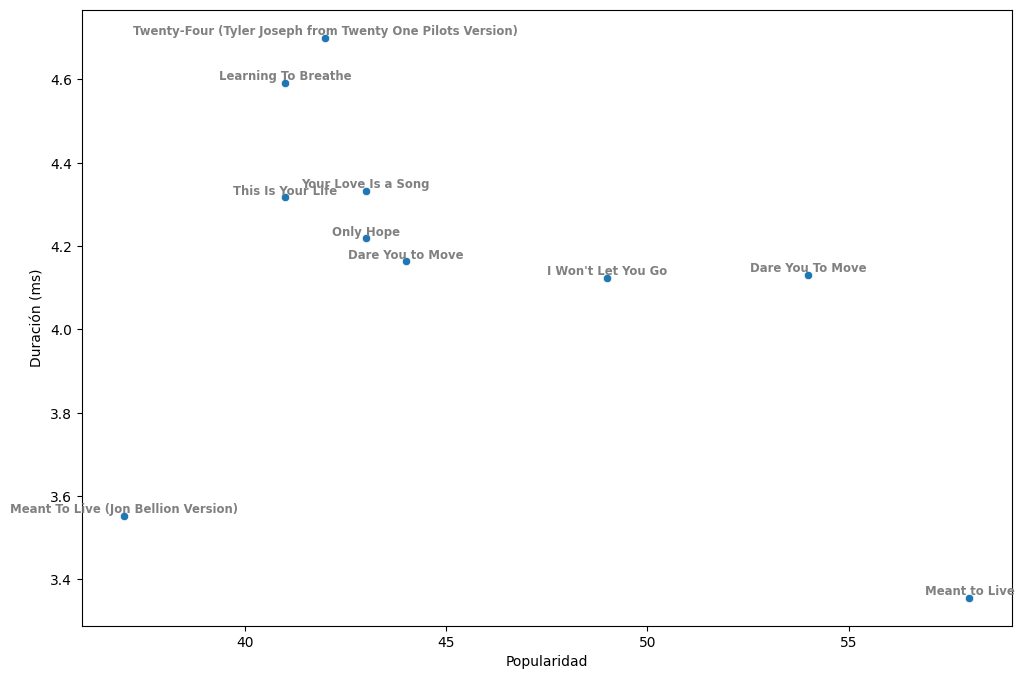

In [9]:
#Creacion del Scatterplot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data = df, x = "popularity", y = "duration_ms")
scatter_plot.set_xlabel("Popularidad")
scatter_plot.set_ylabel("Duración (ms)")

for line in range(0, df.shape[0]):
    scatter_plot.text(df.popularity[line], df.duration_ms[line], 
                      df.name[line], horizontalalignment='center', 
                      size='small', color='gray', weight='semibold',verticalalignment='bottom')

fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")


#Respuesta a la pregunta del Paso 5
#Para ser que existe una tendencia a que las canciones arriba de 4 minutos mantengan una popularidad similar entre 40 y 45
#Sin embargo su cancion mas popular es con diferencia la mas corta.